In [ ]:
!pip install
!pip install textblob
!pip install tweepy
!pip install langdetect
!pip install pycountry

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

import matplotlib.pyplot as plt

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('vader_lexicon')

In [ ]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:

 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity

 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1

 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1

 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number:" ,len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number:" ,len(neutral_list))

total number:  150
positive number: 72
negative number:  44
neutral number: 34


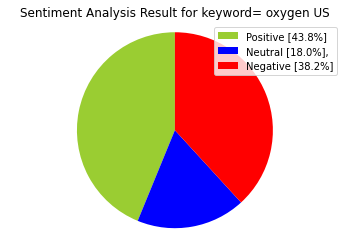

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%],', 'Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"")
plt.axis('equal')
plt.show()

In [ ]:

tweet_list.drop_duplicates(inplace = True)

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]


tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compund'] = comp


tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compund
0,"@Novari13 Yes, that's part of my concern. When...","@Novari13 Yes, that's part of my concern. When...",-0.25,0.375000,positive,NaN,NaN,NaN,NaN
1,RT @uk_domain_names: Brexit was never going to...,RT @uk_domain_names: Brexit was never going to...,0.80,0.750000,positive,NaN,NaN,NaN,NaN
3,RT @ahsek_: “Self-care is not selfish. That’s ...,RT @ahsek_: “Self-care is not selfish. That’s ...,0.25,0.666667,positive,NaN,NaN,NaN,NaN
4,RT @EnvAgencyMids: We’ve been using aeration e...,RT @EnvAgencyMids: We’ve been using aeration e...,0.10,0.400000,neutral,0.0,1.0,0.0,0.0
5,@iillttaaff Even if they read your name out lo...,@iillttaaff Even if they read your name out lo...,0.20,0.500000,neutral,0.0,1.0,0.0,0.0
6,RT @mayormcginn: @NotMyLinkedIn There was 100%...,RT @mayormcginn: @NotMyLinkedIn There was 100%...,0.00,0.000000,neutral,0.0,1.0,0.0,0.0
7,"RT @JustHarley4life: In reality, plants are fa...","RT @JustHarley4life: In reality, plants are fa...",0.00,1.000000,positive,NaN,NaN,NaN,NaN
8,RT @Murambwi_: Highlands renovated by the Stat...,RT @Murambwi_: Highlands renovated by the Stat...,0.10,0.400000,neutral,0.0,1.0,0.0,0.0
9,@NotMyLinkedIn There was 100% lockdown from Du...,@NotMyLinkedIn There was 100% lockdown from Du...,0.00,0.000000,neutral,0.0,1.0,0.0,0.0
10,RT @SolNataMD: All are brave until attached to...,RT @SolNataMD: All are brave until attached to...,0.80,1.000000,negative,NaN,NaN,NaN,NaN


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)

 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,340,40.52
positive,305,36.35
neutral,194,23.12


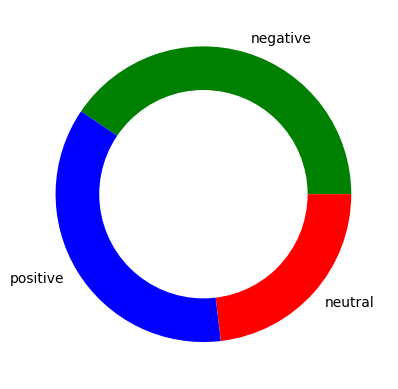

In [ ]:
pichart = count_values_in_column(tweet_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Word Cloud Saved Successfully


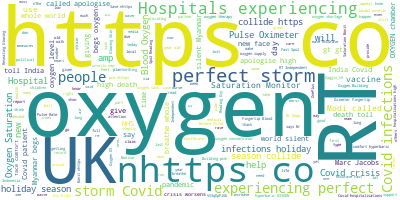

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
#  mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
#  mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

 #Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


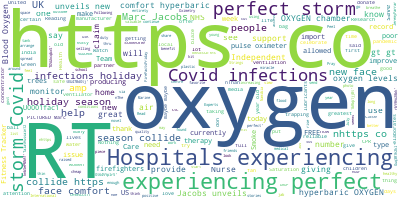

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


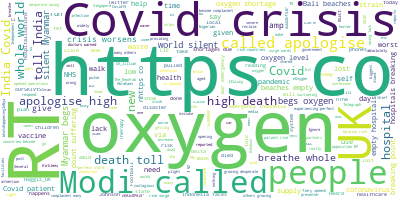

In [ ]:
#Creating wordcloud for neg sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


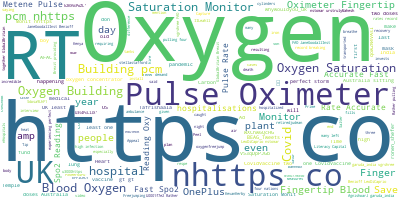

In [ ]:
#Creating wordcloud for neu sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [ ]:
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,129.84
neutral,122.97
positive,132.62


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compund,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@MarianaBaabar No doubt new strains are more c...,@MarianaBaabar No doubt new strains are more c...,0.012121,0.634848,negative,NaN,NaN,NaN,NaN,140,22,MarianaBaabar No doubt new strains are more co...,"[marianabaabar, no, doubt, new, strains, are, ...","[marianabaabar, doubt, new, strains, contagiou...","[marianabaabar, doubt, new, strain, contagi, c..."
1,"RT @roaringrapids22: However, in her UK claims...","RT @roaringrapids22: However, in her UK claims...",0.000000,0.000000,positive,NaN,NaN,NaN,NaN,152,23,RT roaringrapids22 However in her UK claims 12...,"[rt, roaringrapids22, however, in, her, uk, cl...","[rt, roaringrapids22, however, uk, claims, 121...","[rt, roaringrapids22, howev, uk, claim, 12151,..."
2,Some things are fundamental. Strong materials ...,Some things are fundamental. Strong materials ...,0.433333,0.733333,positive,NaN,NaN,NaN,NaN,140,19,Some things are fundamental Strong materials l...,"[some, things, are, fundamental, strong, mater...","[things, fundamental, strong, materials, like,...","[thing, fundament, strong, materi, like, steel..."
3,RT @EWayedd: According to Zahawi everything is...,RT @EWayedd: According to Zahawi everything is...,0.305556,0.666667,positive,NaN,NaN,NaN,NaN,140,23,RT EWayedd According to Zahawi everything is f...,"[rt, ewayedd, according, to, zahawi, everythin...","[rt, ewayedd, according, zahawi, everything, f...","[rt, ewayedd, accord, zahawi, everyth, fine, c..."
4,"Fingertip Pulse Oximeter, Blood Oxygen Saturat...","Fingertip Pulse Oximeter, Blood Oxygen Saturat...",0.000000,0.000000,neutral,0.0,1.0,0.0,0.0,112,16,Fingertip Pulse Oximeter Blood Oxygen Saturati...,"[fingertip, pulse, oximeter, blood, oxygen, sa...","[fingertip, pulse, oximeter, blood, oxygen, sa...","[fingertip, puls, oximet, blood, oxygen, satur..."


In [ ]:
countVectorizer = CountVectorizer(analyzer=clean_text)
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

500 Number of reviews has 2497 words


,,aap,aappraveen,aaronukmex,ab,abderrahman,abdomen,abduct,abhorr,abl,aboutmecf,abpganga,abraham,abroa,abroad,absolut,abt,access,accid,accord,account,accur,accus,acetyl,across,act,activ,activist,actual,ad,add,addit,address,adgt,adult,advic,aerat,aewaew,afac,afrox,...,young,younger,youtub,youv,zahawi,zambia,zubymus,आदरण,ए,एक,ऑक,क,कड,कम,कर,कह,ग,च,ज,जन,तड,द,दम,ध,न,प,पह,ब,भ,म,मर,य,यक,र,ल,व,स,सर,オハイオ州立大学,ロイター
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
,132
rt,132
covid,114
uk,78
hospit,63
storm,38
perfect,38
experienc,36
infect,36
peopl,33


In [ ]:
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0)
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('perfect storm', 38),
 ('hospitals experiencing', 36),
 ('experiencing perfect', 35),
 ('storm covid', 34),
 ('covid infections', 30),
 ('infections holiday', 29),
 ('holiday season', 29),
 ('season collide', 29),
 ('covid crisis', 25),
 ('collide https', 25),
 ('pulse oximeter', 21),
 ('oxygen saturation', 21),
 ('blood oxygen', 16),
 ('saturation monitor', 15),
 ('modi called', 14),
 ('called apologise', 14),
 ('apologise high', 14),
 ('high death', 14),
 ('death toll', 14),
 ('toll india', 14)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('hospitals experiencing perfect', 35),
 ('experiencing perfect storm', 35),
 ('perfect storm covid', 34),
 ('storm covid infections', 29),
 ('covid infections holiday', 29),
 ('infections holiday season', 29),
 ('holiday season collide', 29),
 ('season collide https', 25),
 ('oxygen saturation monitor', 15),
 ('modi called apologise', 14),
 ('called apologise high', 14),
 ('apologise high death', 14),
 ('high death toll', 14),
 ('death toll india', 14),
 ('toll india covid', 12),
 ('india covid crisis', 12),
 ('marc jacobs 58', 12),
 ('breathe world silent', 11),
 ('blood oxygen saturation', 10),
 ('world silent myanmar', 10)]